<a href="https://colab.research.google.com/github/meetshah-35/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")


In [5]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv('/content/creditcard.csv')

# first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
# Check basic info
print(df.info())

# Check for nulls
print(df.isnull().sum())

# Class distribution
print(df['Class'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

In [7]:
# Separate classes
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

# Sample legit transactions to match fraud count
legit_sample = legit.sample(n=len(fraud), random_state=42)

# Combine for new dataset
new_dataset = pd.concat([legit_sample, fraud], axis=0)

# Shuffle
new_dataset = new_dataset.sample(frac=1, random_state=42)

print(new_dataset['Class'].value_counts())


Class
0.0    52
1.0    52
Name: count, dtype: int64


In [8]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)



In [9]:
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

Training Accuracy: 0.9879518072289156
Test Accuracy: 1.0

Confusion Matrix:
 [[11  0]
 [ 0 10]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



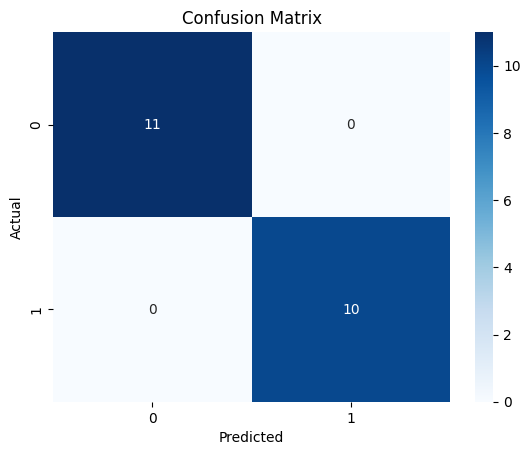

In [10]:
# Training accuracy
train_pred = model.predict(X_train)
train_acc = accuracy_score(Y_train, train_pred)
print("Training Accuracy:", train_acc)

# Test accuracy
test_pred = model.predict(X_test)
test_acc = accuracy_score(Y_test, test_pred)
print("Test Accuracy:", test_acc)

# Confusion Matrix
cm = confusion_matrix(Y_test, test_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
cr = classification_report(Y_test, test_pred)
print("\nClassification Report:\n", cr)

# Visualization (optional)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
